# Logistic Regression

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [2]:
os.chdir("E:\Python AVI\Cute")

In [3]:
Data=pd.read_csv("data.csv")

In [4]:
Data

,Id,State,Accountlength,Areacode,Internationalplan,Voicemailplan,Numbervmailmessages,Totaldayminutes,Totaldaycalls,Totaldaycharge,...,Totalevecalls,Totalevecharge,Totalnightminutes,Totalnightcalls,Totalnightcharge,Totalintlminutes,Totalintlcalls,Totalintlcharge,Customerservicecalls,Churn
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,CUST-6,AL,118,510,Yes,No,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,CUST-7,MA,121,510,No,Yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,CUST-8,MO,147,415,Yes,No,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,CUST-9,LA,117,408,No,No,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,CUST-10,WV,141,415,Yes,Yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
Data.shape

(3333, 21)

In [6]:
Data.dtypes

Id                       object
State                    object
Accountlength             int64
Areacode                  int64
Internationalplan        object
Voicemailplan            object
Numbervmailmessages       int64
Totaldayminutes         float64
Totaldaycalls             int64
Totaldaycharge          float64
Totaleveminutes         float64
Totalevecalls             int64
Totalevecharge          float64
Totalnightminutes       float64
Totalnightcalls           int64
Totalnightcharge        float64
Totalintlminutes        float64
Totalintlcalls            int64
Totalintlcharge         float64
Customerservicecalls      int64
Churn                      bool
dtype: object

In [7]:
Data.describe(include='all')

,Id,State,Accountlength,Areacode,Internationalplan,Voicemailplan,Numbervmailmessages,Totaldayminutes,Totaldaycalls,Totaldaycharge,...,Totalevecalls,Totalevecharge,Totalnightminutes,Totalnightcalls,Totalnightcharge,Totalintlminutes,Totalintlcalls,Totalintlcharge,Customerservicecalls,Churn
count,3333,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,3333,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CUST-1601,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [8]:
print('Total number unique elements in Id column:',len(Data['Id'].unique()))
print('\n')
print('Total number unique elements in State:',len(Data['State'].unique()))
print('\n')
print('Total number unique elements in Areacode:',len(Data['Areacode'].unique()))
print('\n')
print('Total number unique elements in Accountlength:',len(Data['Accountlength'].unique()))
print('\n')
print('Total number unique elements in Internationalplan:',len(Data['Internationalplan'].unique()))
print('\n')
print('Total number unique elements in Voicemailplan:',len(Data['Voicemailplan'].unique()))
print('\n')
print('Total number unique elements in Numbervmailmessages:',len(Data['Numbervmailmessages'].unique()))
print('\n')
print('Total number unique elements in Totaldayminutes:',len(Data['Totaldayminutes'].unique()))
print('\n')
print('Total number unique elements in Totaldaycalls:',len(Data['Totaldaycalls'].unique()))
print('\n')
print('Total number unique elements in Totaldaycharge:',len(Data['Totaldaycharge'].unique()))
print('\n')
print('Total number unique elements in Totaleveminutes:',len(Data['Totaleveminutes'].unique()))
print('\n')
print('Total number unique elements in Totalevecalls:',len(Data['Totalevecalls'].unique()))
print('\n')
print('Total number unique elements in Totalevecharge:',len(Data['Totalevecharge'].unique()))
print('\n')
print('Total number unique elements in Totalnightminutes:',len(Data['Totalnightminutes'].unique()))
print('\n')
print('Total number unique elements in Totalnightcalls:',len(Data['Totalnightcalls'].unique()))
print('\n')
print('Total number unique elements in Totalnightcharge:',len(Data['Totalnightcharge'].unique()))
print('\n')
print('Total number unique elements in Totalintlminutes:',len(Data['Totalintlminutes'].unique()))
print('\n')
print('Total number unique elements in Totalintcalls:',len(Data['Totalintlcalls'].unique()))
print('\n')
print('Total number unique elements in Totalintlcharge:',len(Data['Totalintlcharge'].unique()))
print('\n')
print('Total number unique elements in Customerservicecalls:',len(Data['Customerservicecalls'].unique()))
print('\n')
print('Total number unique elements in Churn:',len(Data['Churn'].unique()))

Total number unique elements in Id column: 3333


Total number unique elements in State: 51


Total number unique elements in Areacode: 3


Total number unique elements in Accountlength: 212


Total number unique elements in Internationalplan: 2


Total number unique elements in Voicemailplan: 2


Total number unique elements in Numbervmailmessages: 46


Total number unique elements in Totaldayminutes: 1667


Total number unique elements in Totaldaycalls: 119


Total number unique elements in Totaldaycharge: 1667


Total number unique elements in Totaleveminutes: 1611


Total number unique elements in Totalevecalls: 123


Total number unique elements in Totalevecharge: 1440


Total number unique elements in Totalnightminutes: 1591


Total number unique elements in Totalnightcalls: 120


Total number unique elements in Totalnightcharge: 933


Total number unique elements in Totalintlminutes: 162


Total number unique elements in Totalintcalls: 21


Total number unique elements in Totali

In [9]:
Data['Areacode']=Data.Areacode.astype(object)

Data['State']=Data.State.astype(object)

#Data=Data.astype({'Areacode':'object','State':'object'})

In [10]:
Data.describe(include='all')

,Id,State,Accountlength,Areacode,Internationalplan,Voicemailplan,Numbervmailmessages,Totaldayminutes,Totaldaycalls,Totaldaycharge,...,Totalevecalls,Totalevecharge,Totalnightminutes,Totalnightcalls,Totalnightcharge,Totalintlminutes,Totalintlcalls,Totalintlcharge,Customerservicecalls,Churn
count,3333,3333,3333.000000,3333.0,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,3333,51,NaN,3.0,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CUST-1601,WV,NaN,415.0,No,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,1,106,NaN,1655.0,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,NaN,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,NaN,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,NaN,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,NaN,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [11]:
Data.dtypes

Id                       object
State                    object
Accountlength             int64
Areacode                 object
Internationalplan        object
Voicemailplan            object
Numbervmailmessages       int64
Totaldayminutes         float64
Totaldaycalls             int64
Totaldaycharge          float64
Totaleveminutes         float64
Totalevecalls             int64
Totalevecharge          float64
Totalnightminutes       float64
Totalnightcalls           int64
Totalnightcharge        float64
Totalintlminutes        float64
Totalintlcalls            int64
Totalintlcharge         float64
Customerservicecalls      int64
Churn                      bool
dtype: object

In [12]:
#IQR
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
IQR



Accountlength           53.00
Numbervmailmessages     20.00
Totaldayminutes         72.70
Totaldaycalls           27.00
Totaldaycharge          12.36
Totaleveminutes         68.70
Totalevecalls           27.00
Totalevecharge           5.84
Totalnightminutes       68.30
Totalnightcalls         26.00
Totalnightcharge         3.07
Totalintlminutes         3.60
Totalintlcalls           3.00
Totalintlcharge          0.97
Customerservicecalls     1.00
Churn                    0.00
dtype: float64

In [13]:
#Upper fence and Lower fence values of Data.
UF=(Q3 + 1.5 * IQR)
print(UF)


LF=(Q1-1.5*IQR)
LF

Accountlength           206.500
Numbervmailmessages      50.000
Totaldayminutes         325.450
Totaldaycalls           154.500
Totaldaycharge           55.330
Totaleveminutes         338.350
Totalevecalls           154.500
Totalevecharge           28.760
Totalnightminutes       337.750
Totalnightcalls         152.000
Totalnightcharge         15.195
Totalintlminutes         17.500
Totalintlcalls           10.500
Totalintlcharge           4.725
Customerservicecalls      3.500
Churn                     0.000
dtype: float64


Accountlength           -5.500
Numbervmailmessages    -30.000
Totaldayminutes         34.650
Totaldaycalls           46.500
Totaldaycharge           5.890
Totaleveminutes         63.550
Totalevecalls           46.500
Totalevecharge           5.400
Totalnightminutes       64.550
Totalnightcalls         48.000
Totalnightcharge         2.915
Totalintlminutes         3.100
Totalintlcalls          -1.500
Totalintlcharge          0.845
Customerservicecalls    -0.500
Churn                    0.000
dtype: float64

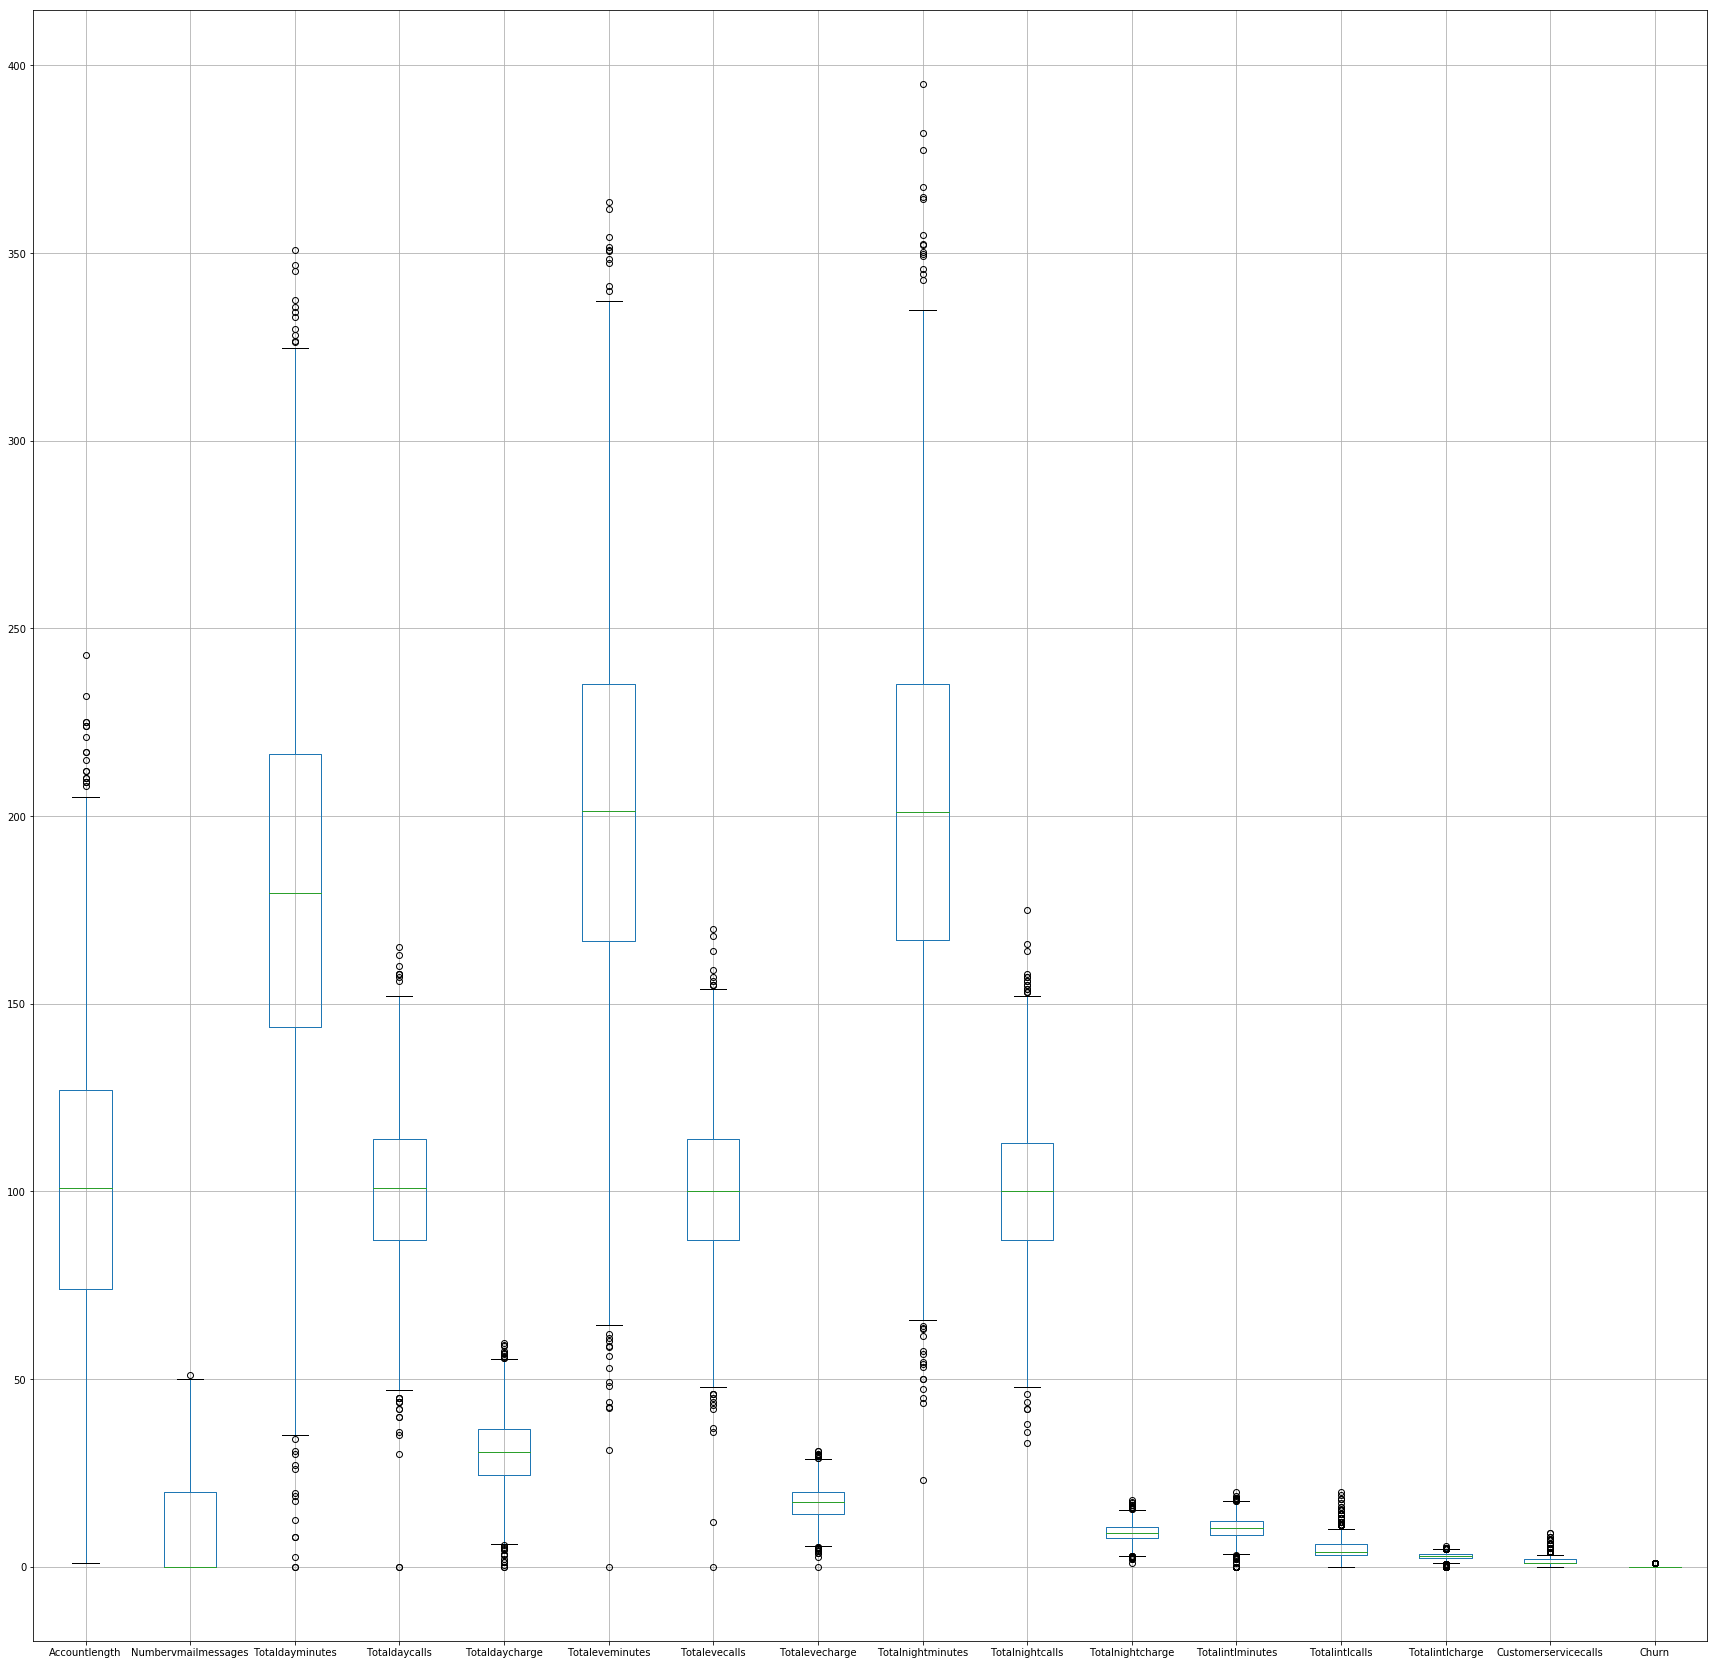

In [14]:
boxplot=Data.boxplot(figsize=(30,30))

## working on numeric data

In [15]:
Data['Accountlength']=np.where(Data['Accountlength']>206.500,206.500,Data['Accountlength'])

Data['Totaldayminutes']=np.where(Data['Totaldayminutes']>325.450,325.450,(np.where(Data['Totaldayminutes']<34.650,34.650,Data['Totaldayminutes'])))

Data['Numbervmailmessages']=np.where(Data['Numbervmailmessages']>50.000,50.000,(np.where(Data['Numbervmailmessages']< -30.000,-30.000,Data['Numbervmailmessages'])))

Data['Totaldaycalls']=np.where(Data['Totaldaycalls']>154.500,154.500,(np.where(Data['Totaldaycalls']< 46.500,46.500,Data['Totaldaycalls'])))

Data['Totaldaycharge']=np.where(Data['Totaldaycharge']>55.330,55.330,(np.where(Data['Totaldaycharge']< 5.900,5.900,Data['Totaldaycharge'])))

Data['Totaleveminutes']=np.where(Data['Totaleveminutes']>338.350,338.350,(np.where(Data['Totaleveminutes']< 63.550,63.550,Data['Totaleveminutes'])))

Data['Totalevecalls']=np.where(Data['Totalevecalls']>154.500,154.500,(np.where(Data['Totalevecalls']< 46.500,46.500,Data['Totalevecalls'])))

Data['Totalevecharge']=np.where(Data['Totalevecharge']>28.76000,28.76000,(np.where(Data['Totalevecharge']< 5.400,5.400,Data['Totalevecharge'])))

Data['Totalnightminutes']=np.where(Data['Totalnightminutes']>337.750,337.750,(np.where(Data['Totalnightminutes']< 64.550,64.550,Data['Totalnightminutes'])))

Data['Totalnightcalls']=np.where(Data['Totalnightcalls']>152.000,152.000,(np.where(Data['Totalnightcalls']< 48.000,48.000,Data['Totalnightcalls'])))

Data['Totalnightcharge']=np.where(Data['Totalnightcharge']>15.195,15.195,(np.where(Data['Totalnightcharge']< 2.915,2.915,Data['Totalnightcharge'])))

Data['Totalintlminutes']=np.where(Data['Totalintlminutes']>17.500,17.500,(np.where(Data['Totalintlminutes']< 3.110,3.110,Data['Totalintlminutes'])))

Data['Totalintlcalls']=np.where(Data['Totalintlcalls']>10.500,10.500,(np.where(Data['Totalintlcalls']< -1.500,-1.500,Data['Totalintlcalls'])))

Data['Totalintlcharge']=np.where(Data['Totalintlcharge']>4.725,4.725,(np.where(Data['Totalintlcharge']< 0.845,0.845,Data['Totalintlcharge'])))

Data['Customerservicecalls']=np.where(Data['Customerservicecalls']>3.500,3.500,(np.where(Data['Customerservicecalls']< -0.500,-0.500,Data['Customerservicecalls'])))

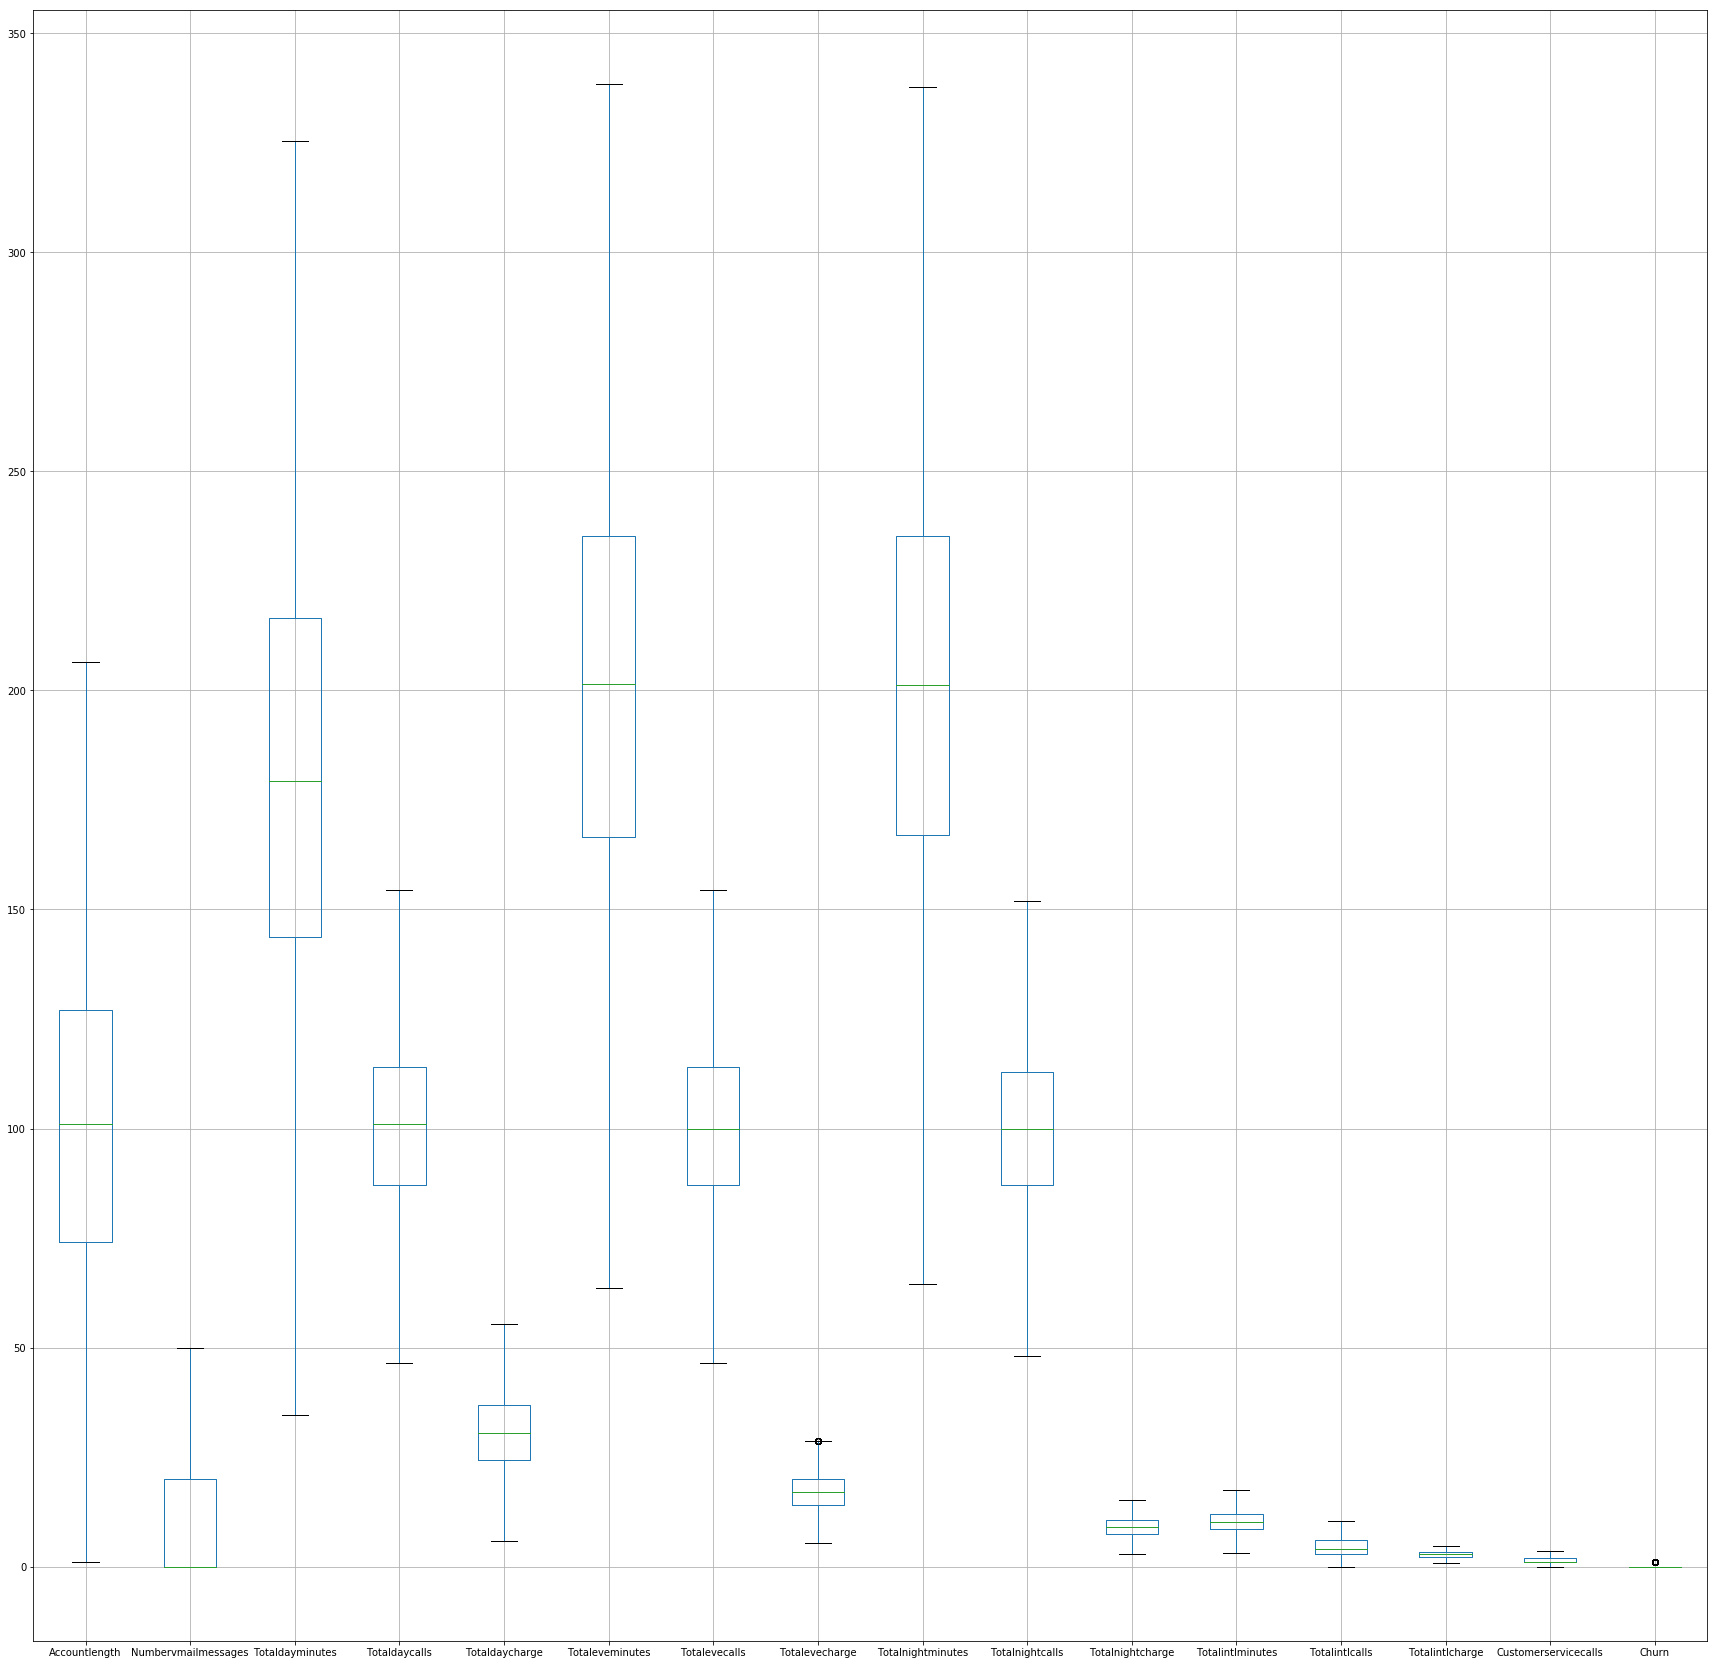

In [16]:
boxplot=Data.boxplot(figsize=(30,30))

In [17]:
max(Data['Totalevecharge'])

28.76

## working on Categorical data

In [18]:
del Data['Id']

In [19]:
DataNum=Data[['Accountlength', 'Numbervmailmessages', 'Totaldayminutes',
       'Totaldaycalls', 'Totaldaycharge', 'Totaleveminutes', 'Totalevecalls',
       'Totalevecharge', 'Totalnightminutes', 'Totalnightcalls',
       'Totalnightcharge', 'Totalintlminutes', 'Totalintlcalls',
       'Totalintlcharge', 'Customerservicecalls']]

In [20]:
from sklearn.preprocessing import StandardScaler

DataNum= StandardScaler().fit_transform(DataNum)


In [21]:
DataNum

array([[ 0.68107846,  1.23498853,  1.57512819, ..., -0.62713082,
        -0.09439897, -0.43024898],
       [ 0.15128601,  1.3080592 , -0.33643866, ..., -0.62713082,
         1.26737806, -0.43024898],
       [ 0.90813236, -0.59177813,  1.17434557, ...,  0.25315009,
         0.70904948, -1.33356857],
       ...,
       [-1.84174272, -0.59177813,  0.01817084, ...,  0.69329055,
         1.41717354,  0.47307061],
       [ 2.09385832, -0.59177813,  0.62765593, ...,  2.45385237,
        -1.93279797,  0.47307061],
       [-0.68124498,  1.23498853,  1.00812237, ..., -0.18699037,
         1.26737806, -1.33356857]])

In [22]:
DataNum=pd.DataFrame(DataNum)

In [23]:
DataNum

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.681078,1.234989,1.575128,0.479660,1.575411,-0.071627,-0.057407,-0.071441,0.875492,-0.468006,0.874825,-0.093617,-0.627131,-0.094399,-0.430249
1,0.151286,1.308059,-0.336439,1.134217,-0.336724,-0.109330,0.145067,-0.108793,1.069062,0.149253,1.069958,1.266504,-0.627131,1.267378,-0.430249
2,0.908132,-0.591778,1.174346,0.681062,1.174514,-1.583717,0.499397,-1.584225,-0.762868,0.200691,-0.761631,0.715103,0.253150,0.709049,-1.333569
3,-0.428963,-0.591778,2.208623,-1.484012,2.208806,-2.727707,-0.614211,-2.728151,-0.078389,-0.570882,-0.078665,-1.343458,1.133431,-1.347234,0.473071
4,-0.656017,-0.591778,-0.242246,0.630711,-0.242204,-1.045953,1.106820,-1.044945,-0.277945,1.075140,-0.278233,-0.056857,-0.627131,-0.053546,1.376390
5,0.428796,-0.591778,0.804961,-0.124547,0.805125,0.388747,0.043830,0.388464,0.061301,0.920826,0.063249,-1.453738,0.693291,-1.456176,-1.333569
6,0.504481,1.161918,0.708921,-0.628052,0.708431,2.725344,0.398160,2.725342,0.234915,0.920826,0.236208,-1.012618,1.133431,-1.006790,1.376390
7,1.160414,-0.591778,-0.421397,-1.081207,-0.421466,-1.942888,-0.310500,-1.943745,0.218951,-0.210815,0.218469,-1.159658,0.693291,-1.156585,-1.333569
8,0.403568,-0.591778,0.086507,-0.174898,0.086988,2.725344,-1.019160,2.725342,0.298773,-0.519444,0.298296,-0.571498,-0.186990,-0.571021,-0.430249
9,1.009045,2.111837,1.455078,-0.829455,1.454816,0.416529,0.550015,0.416479,2.505869,-0.159377,2.506845,0.347503,0.253150,0.341370,-1.333569


In [24]:
DataCat=Data[['State','Areacode','Internationalplan','Voicemailplan']]

In [25]:
DataCat=pd.get_dummies(DataCat)

In [26]:
DataCat

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_WI,State_WV,State_WY,Areacode_408,Areacode_415,Areacode_510,Internationalplan_No,Internationalplan_Yes,Voicemailplan_No,Voicemailplan_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [27]:
Dep_Var=Data[['Churn']]

In [28]:
DataFea=pd.concat([DataNum,DataCat],axis=1)

In [29]:
DataFea

,0,1,2,3,4,5,6,7,8,9,...,State_WI,State_WV,State_WY,Areacode_408,Areacode_415,Areacode_510,Internationalplan_No,Internationalplan_Yes,Voicemailplan_No,Voicemailplan_Yes
0,0.681078,1.234989,1.575128,0.479660,1.575411,-0.071627,-0.057407,-0.071441,0.875492,-0.468006,...,0,0,0,0,1,0,1,0,0,1
1,0.151286,1.308059,-0.336439,1.134217,-0.336724,-0.109330,0.145067,-0.108793,1.069062,0.149253,...,0,0,0,0,1,0,1,0,0,1
2,0.908132,-0.591778,1.174346,0.681062,1.174514,-1.583717,0.499397,-1.584225,-0.762868,0.200691,...,0,0,0,0,1,0,1,0,1,0
3,-0.428963,-0.591778,2.208623,-1.484012,2.208806,-2.727707,-0.614211,-2.728151,-0.078389,-0.570882,...,0,0,0,1,0,0,0,1,1,0
4,-0.656017,-0.591778,-0.242246,0.630711,-0.242204,-1.045953,1.106820,-1.044945,-0.277945,1.075140,...,0,0,0,0,1,0,0,1,1,0
5,0.428796,-0.591778,0.804961,-0.124547,0.805125,0.388747,0.043830,0.388464,0.061301,0.920826,...,0,0,0,0,0,1,0,1,1,0
6,0.504481,1.161918,0.708921,-0.628052,0.708431,2.725344,0.398160,2.725342,0.234915,0.920826,...,0,0,0,0,0,1,1,0,0,1
7,1.160414,-0.591778,-0.421397,-1.081207,-0.421466,-1.942888,-0.310500,-1.943745,0.218951,-0.210815,...,0,0,0,0,1,0,0,1,1,0
8,0.403568,-0.591778,0.086507,-0.174898,0.086988,2.725344,-1.019160,2.725342,0.298773,-0.519444,...,0,0,0,1,0,0,1,0,1,0
9,1.009045,2.111837,1.455078,-0.829455,1.454816,0.416529,0.550015,0.416479,2.505869,-0.159377,...,0,1,0,0,1,0,0,1,0,1


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

NameError: name 'X' is not defined

In [ ]:
pca

In [ ]:
principalComponents.shape

In [ ]:
finalDf = pd.concat([principalDf,Y], axis = 1)

In [ ]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 15)
targets = [True, False]
colors = ['r','b']



for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Churn'] == target
    ax.scatter(finalDf[indicesToKeep, 'principal component 1']
               , finaDf[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=123)

NameError: name 'X' is not defined

In [ ]:
log_mod=LogisticRegression(random_state=123)
model=log_mod.fit(X_train,Y_train)

In [ ]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [ ]:
Confusionmatrix_Train=confusion_matrix(Y_train,train_pred)
Confusionmatrix_Test=confusion_matrix(Y_test,test_pred)

print("Train Confusion Matrix:\n",Confusionmatrix_Train)
print("Test Confusion Matrix:\n",Confusionmatrix_Test)

print("Train Accuracy:", accuracy_score(Y_train,train_pred))
print("Test Accuracy:",accuracy_score(Y_test,test_pred))

In [ ]:
print("Sensitivity(TPR) Train Logistic:",Confusionmatrix_Train[0,0]/(Confusionmatrix_Train[0,0] +Confusionmatrix_Train[0,1]))  #recall or sensitivity
print("Specificity(TNR) Train Logistic:",Confusionmatrix_Train[1,1]/(Confusionmatrix_Train[1,0] +Confusionmatrix_Train[1,1]))  #Specificity
print("Precision Train Logistic:",Confusionmatrix_Train[0,0]/(Confusionmatrix_Train[0,0] +Confusionmatrix_Train[1,0]))  #Positive Predicted Value
print("False Positive Rate Train Logistic:",Confusionmatrix_Train[1,0]/(Confusionmatrix_Train[1,0] +Confusionmatrix_Train[1,1]))  #False positive rate=1-specificity

In [ ]:
print("Sensitivity(TPR) Test Logistic:",Confusionmatrix_Test[0,0]/(Confusionmatrix_Test[0,0] +Confusionmatrix_Test[0,1]))  #recall or sensitivity
print("Specificity(TNR) Test Logistic:",Confusionmatrix_Test[1,1]/(Confusionmatrix_Test[1,0] +Confusionmatrix_Test[1,1]))  #Specificity
print("Precision Test Logistic:",Confusionmatrix_Test[0,0]/(Confusionmatrix_Test[0,0] +Confusionmatrix_Test[1,0]))  #Positive Predicted Value
print("False Positive Rate Test Logistic:",Confusionmatrix_Test[1,0]/(Confusionmatrix_Test[1,0] +Confusionmatrix_Test[1,1]))  #False positive rate=1-specificity

## ROC CURVE & AUC

In [ ]:
train_pred_prob=model.predict_proba(X_train)
print(train_pred_prob)

In [ ]:
train_pred_prob

In [ ]:
train_pred_prob=train_pred_prob[:,1]

In [ ]:
train_pred_prob

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_train, train_pred_prob)
ROC_AUC = auc(fpr, tpr)
ROC_AUC

In [ ]:
#ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, color='green',label = 'AUC = %0.25f' % ROC_AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Naive Bayes solution

In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [ ]:
os.chdir("E:\Python AVI\Cute")

In [ ]:
Data=pd.read_csv("data.csv")

In [ ]:
del Data['Id']

In [ ]:
Data['Areacode']=Data.Areacode.astype(object)

Data['State']=Data.State.astype(object)

#Data=Data.astype({'Areacode':'object','State':'object'})

In [ ]:
Data1=pd.get_dummies(Data, columns=['State','Internationalplan','Voicemailplan'],
                     drop_first=True)


In [ ]:
Dep_var = "Churn"
X = Data1.drop(Dep_var,axis=1)
Y = Data1[Dep_var]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [ ]:
gnb= GaussianNB()
bnb=BernoulliNB()

In [ ]:
Y_train_gnb=gnb.fit(X_train,Y_train).predict(X_train)
CMTrainGNB=confusion_matrix(Y_train,Y_train_gnb)

In [ ]:
print(CMTrainGNB)
AccuracyTrain=accuracy_score(Y_train,Y_train_gnb)
print("Train Accuracy GNB:",AccuracyTrain)

In [ ]:
print("Sensitivity(TPR) Train GNB:",CMTrainGNB[0,0]/(CMTrainGNB[0,0] +CMTrainGNB[0,1]))  #recall or sensitivity
print("Specificity(TNR) Train GNB:",CMTrainGNB[1,1]/(CMTrainGNB[1,0] +CMTrainGNB[1,1]))  #Specificity
print("Precision Train GNB:",CMTrainGNB[0,0]/(CMTrainGNB[0,0] +CMTrainGNB[1,0]))  #Positive Predicted Value
print("False Positive Rate Train GNB:",CMTrainGNB[1,0]/(CMTrainGNB[1,0] +CMTrainGNB[1,1]))  #False positive rate=1-specificity

In [ ]:
Y_test_gnb=gnb.fit(X_test,Y_test).predict(X_test)
CMTestGNB=confusion_matrix(Y_test,Y_test_gnb)

In [ ]:
print(CMTestGNB)
AccuracyTest=accuracy_score(Y_test,Y_test_gnb)
print("Test Accuracy GNB:",AccuracyTest)

In [ ]:
print("Sensitivity(TPR) Test GNB:",CMTestGNB[0,0]/(CMTestGNB[0,0] +CMTestGNB[0,1]))  #recall or sensitivity
print("Specificity(TNR) Test GNB:",CMTestGNB[1,1]/(CMTestGNB[1,0] +CMTestGNB[1,1]))  #Specificity
print("Precision Test GNB:",CMTestGNB[0,0]/(CMTestGNB[0,0] +CMTestGNB[1,0]))  #Positive Predicted Value
print("False Positive Rate Test GNB:",CMTestGNB[1,0]/(CMTestGNB[1,0] +CMTestGNB[1,1]))  #False positive rate=1-specificity

### Bernoulli's Naive Bayes

In [ ]:
Y_train_bnb=bnb.fit(X_train,Y_train).predict(X_train)
CMTrainBNB=confusion_matrix(Y_train,Y_train_bnb)

In [ ]:
print(CMTrainBNB)
AccuracyTrainBNB=accuracy_score(Y_train,Y_train_bnb)
print('Train Accuracy BNB:',AccuracyTrainBNB)

In [ ]:
print("Sensitivity(TPR) Train BNB:",CMTrainBNB[0,0]/(CMTrainBNB[0,0] +CMTrainBNB[0,1]))  #recall or sensitivity
print("Specificity(TNR) Train BNB:",CMTrainBNB[1,1]/(CMTrainBNB[1,0] +CMTrainBNB[1,1]))  #Specificity
print("Precision Train BNB:",CMTrainBNB[0,0]/(CMTrainBNB[0,0] +CMTrainBNB[1,0]))  #Positive Predicted Value
print("False Positive Rate Train BNB:",CMTrainBNB[1,0]/(CMTrainBNB[1,0] +CMTrainBNB[1,1]))  #False positive rate=1-specificity

In [ ]:
Y_test_bnb=bnb.fit(X_test,Y_test).predict(X_test)
CMTestBNB=confusion_matrix(Y_test,Y_test_bnb)

In [ ]:
print(CMTestBNB)
AccuracyTestBNB=accuracy_score(Y_test,Y_test_bnb)
print("Test Accuracy BNB:",AccuracyTestBNB)

In [ ]:
print("Sensitivity(TPR) Test BNB:",CMTestBNB[0,0]/(CMTestBNB[0,0] +CMTestBNB[0,1]))  #recall or sensitivity
print("Specificity(TNR) Test BNB:",CMTestBNB[1,1]/(CMTestBNB[1,0] +CMTestBNB[1,1]))  #Specificity
print("Precision Test BNB:",CMTestBNB[0,0]/(CMTestBNB[0,0] +CMTestBNB[1,0]))  #Positive Predicted Value
print("False Positive Rate Test BNB:",CMTestBNB[1,0]/(CMTestBNB[1,0] +CMTestBNB[1,1]))  #False positive rate=1-specificity